In [15]:
#911 Calls Project 
#Data from kaggle.com
#https://www.kaggle.com/mchirico/montcoalert

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [4]:
df = pd.read_csv('911.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [11]:
#What are top 5 911 call zip codes?
df['zip'].value_counts().nlargest(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [12]:
#What are top 5 911 call townships(twp)?
df['twp'].value_counts().nlargest(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [14]:
#How many unique title codes are there in 'title' column?
df['title'].nunique()

110

In [100]:
#Make a new column that returns the reason of the column using lambda
df['REASON']=df['title'].apply(lambda s:s.split(':')[0])

In [101]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [105]:
#What is the most common reason for a 911 call?
df['REASON'].value_counts().nlargest(1)

EMS    48877
Name: REASON, dtype: int64

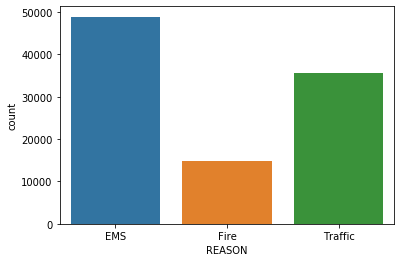

In [112]:
#Using seaborn to make a countplot of "REASON" data
sns.countplot(x='REASON',data=df)

In [143]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [144]:
#Convert timeStamp to date time format

In [145]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [157]:
time = df['timeStamp'].iloc[0]

In [165]:
time.month

12

In [173]:
df['Month']=df['timeStamp'].apply(lambda t:t.month)

In [175]:
df['Hour']=df['timeStamp'].apply(lambda t:t.hour)

In [176]:
df['Day Of The Week']=df['timeStamp'].apply(lambda t:t.dayofweek)

In [180]:
#Change the days of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day Of The Week'].map(dmap)

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day Of The Week, Length: 99492, dtype: object

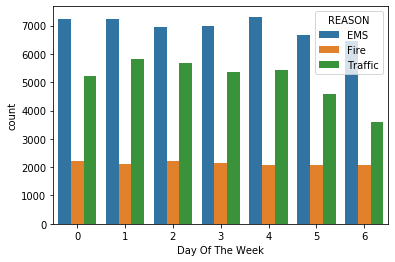

In [187]:
#Using seaborn to make a count plot of 'day of the week' with hue of 'reason'

sns.countplot(x = df['Day Of The Week'], data = df, hue = df['REASON'])

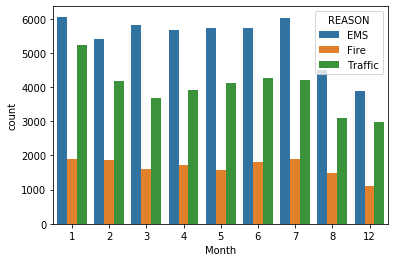

In [188]:
#Using seaborn to make a count plot of 'Month' with hue of 'reason'

sns.countplot(x = df['Month'], data = df, hue = df['REASON'])

In [192]:
#Months 9,10, 11 are missing. Need to aggregrate
byMonth = df.groupby('Month').count()

In [197]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,REASON,Hour,Day Of The Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


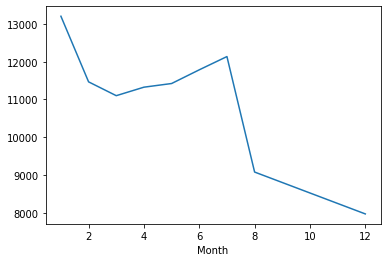

In [202]:
byMonth['REASON'].plot.line()

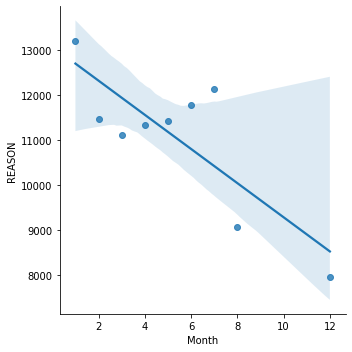

In [272]:
#Checking seaborn regression plot
#Reset index to column
sns.lmplot(x='Month',y='REASON',data=byMonth.reset_index())


In [220]:
#Create a new column for dates using the .date method
#Applying this with a lambda function
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

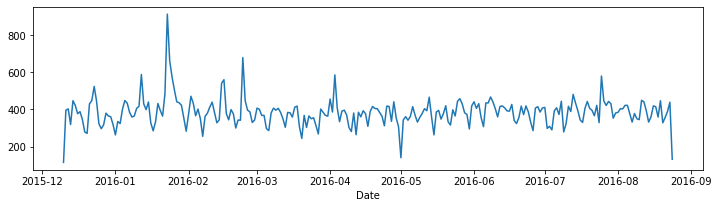

In [247]:
df.groupby('Date').count()['REASON'].plot(figsize=(12,3))


Text(0.5, 1.0, 'FIRE')

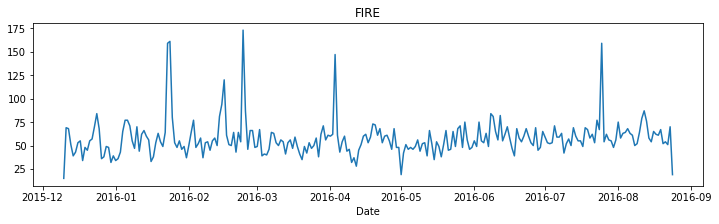

In [267]:
#Separaing out the plots for each 'REASON'
df[df['REASON']=='Fire'] #Selecting the FIRE Data
df[df['REASON']=='Fire'].groupby('Date').count()['REASON'].plot(figsize=(12,3)) #Plotting the data
plt.title('FIRE')

Text(0.5, 1.0, 'EMS')

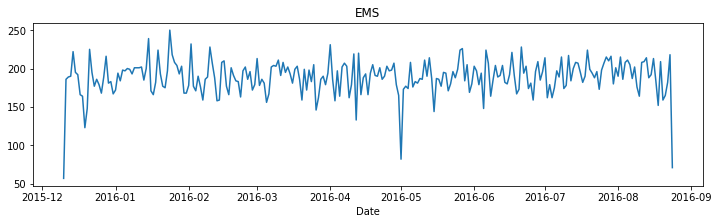

In [268]:
df[df['REASON']=='EMS'] #Selecting the EMS Data
df[df['REASON']=='EMS'].groupby('Date').count()['REASON'].plot(figsize=(12,3)) #Plotting the data
plt.title('EMS')

Text(0.5, 1.0, 'Traffic')

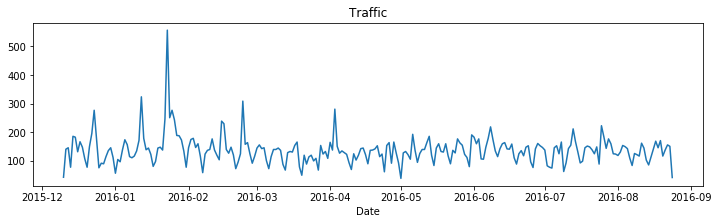

In [271]:
df[df['REASON']=='Traffic'] #Selecting the Traffic Data
df[df['REASON']=='Traffic'].groupby('Date').count()['REASON'].plot(figsize=(12,3)) #Plotting the data
plt.title('Traffic')

In [285]:
#Preparation for heatmap studies
#Map for better day viewing
df['Day Of The Week']=df['Day Of The Week'].map(dmap)
#Make pivot table
dayHour = df.groupby(by=['Day Of The Week','Hour']).count()['REASON'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of The Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


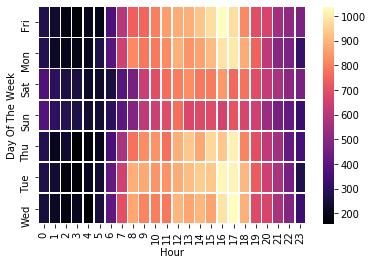

In [292]:
#Generate heat map
sns.heatmap(dayHour,cmap='magma',linecolor='white',linewidths=0.5)#modified

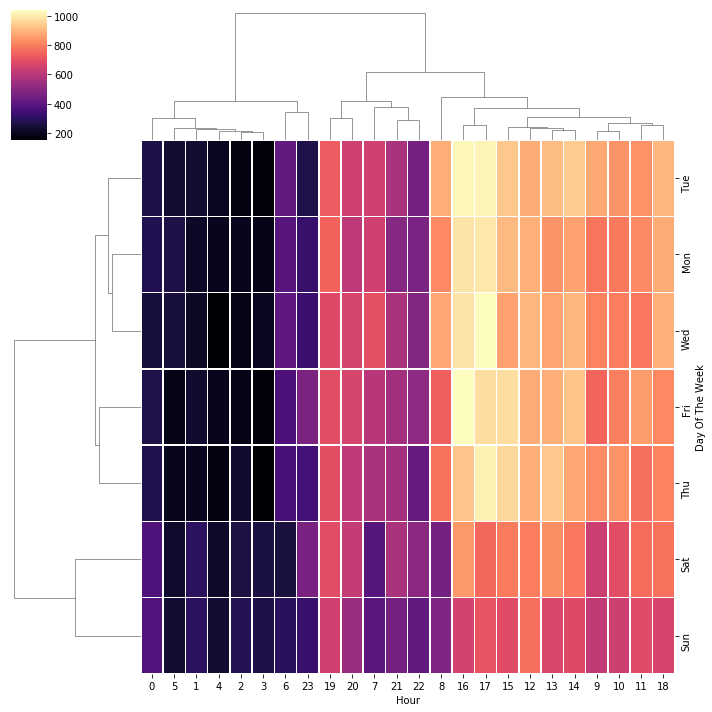

In [294]:
#Cluster map inlcuded
sns.clustermap(dayHour,cmap='magma',linewidths=0.5)

In [296]:
#Preparations of month in column as a heat table
dayMonth = df.groupby(by=['Day Of The Week','Month']).count()['REASON'].unstack()
dayMonth 

Month,1,2,3,4,5,6,7,8,12
Day Of The Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


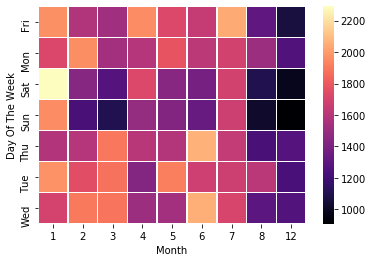

In [297]:
#Making heat plot of dayMonth
sns.heatmap(dayMonth,cmap='magma',linecolor='white',linewidths=0.5)#modified

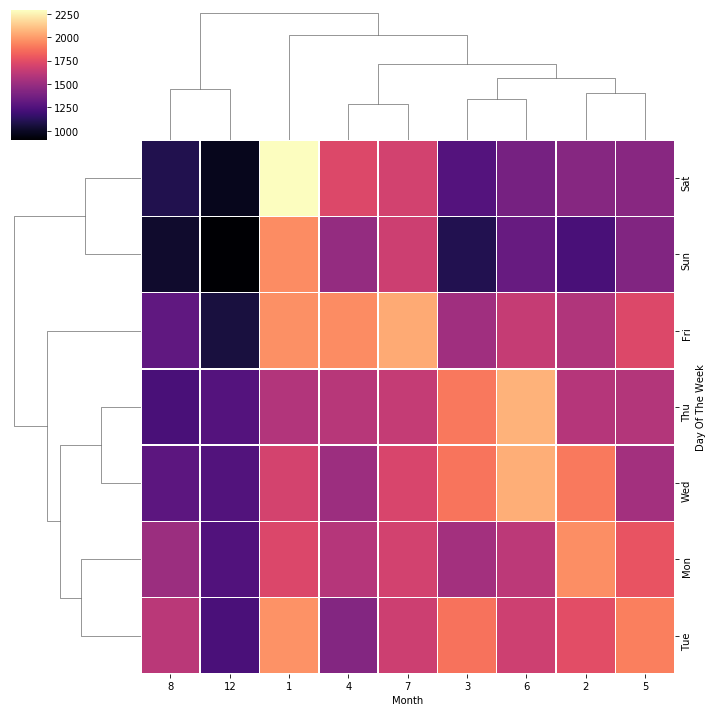

In [298]:
#Clustermap of above
sns.clustermap(dayMonth,cmap='magma',linewidths=0.5)